# Predicting House Prices Using Linear Regression

In this project, we will work with housing data for the city of Ames, Iowa, United States from 2006 to 2010.

Each row in the dataset describes the properties of a single house, as well as the amount it was sold for. In this project, we will feature engineer and fit the data to a Linear Regression model, to predict the final sale prices for houses

We will follow these steps:

1. Acquire the data
2. Explore the data
3. Engineer and transform the features and the target variable
4. Build a model
5. Make and submit predictions

The below are the fields found in the training data set:

- SalePrice - the property's sale price in dollars. This is the target variable we will predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


In [1]:
# import the data
import pandas as pd
import numpy as np

train = pd.read_csv(r'C:\projectdatasets\houseprice_train.csv')
test = pd.read_csv(r'C:\projectdatasets\houseprice_test.csv')

In [2]:
# examine the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


The test set has 80 columns, while train has 81. This is due to the fact that the test data does not include the final sale price information

In [3]:
# examine the first few rows of the training data set
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We will aim to predict the final price of each home

Looking at the data, we see features we expected, like 'YrSold' and 'SalePrice'. Others are unusual, such as 'LandSlope' (the slope of the land the home is built upon) and 'RoofMatl' (the materials used to construct the roof)

We should do some plotting during the exploration stage, so we need to import that functionality into our environment. Plotting allows us to visualize the distribution of the data, check for outliers, and see other patterns. We will use Matplotlib, a popular visualisation library

In [6]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## Data Exploration and Feature Engineering

The challenge is to predict the final sale price of the homes. This information is stored in the 'SalePrice' column.

In [9]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see the average sale price of a house is close to 180,000 dollars, with most of the values falling within the 130,000 to 215,000 dollar range.

Next, we will check for skewness, which is a measure of the shape of the distribution of values.

When performing regression, it makes sense to log-transform the target variable when it is skewed. This is to improve the linearity of the data. The predictions generated by the final model will also be log-transformed, so we need to convert these predictions back to their original form later.

'np.log()' will transform the variable, and 'np.exp()' will reverse the transformation.

We will use 'plt.hist()' to plot a histogram of 'SalePrice'.

Skey is: 1.8828757597682129


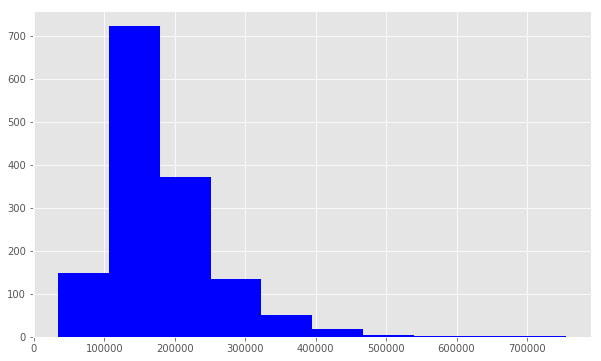

In [15]:
print("Skey is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We can see the distribution has a longer tail on the right, so the distribution is positively skewed. 

We can use 'np.log()' to transform train.SalePrice.

In [16]:
# reminder of what the values look like before 'log' transformation
train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [19]:
# create new series 'target' of just the sales prices, transformed via log
target = np.log(train.SalePrice)
target.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

We can now calculate the skewness a second time, and re-plot the data. A value closer to 0 means that we have improved the skewness of the data. 

Skew is: 0.12133506220520406


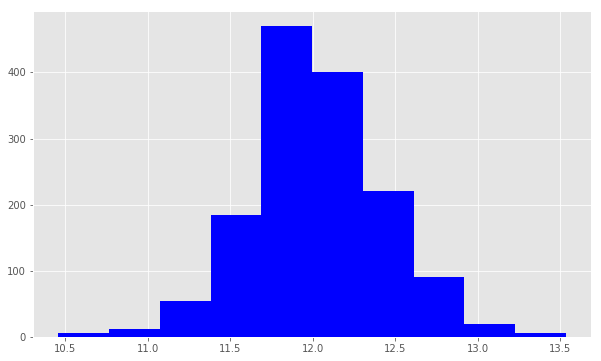

In [20]:
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

## Working with Numeric Features

Now we have transformed the target variable, we will consider features. First, we will check the numerical features, and make some plots

The '.select_dtypes()' method will return a subset of columns matching the specified data types

In [22]:
numeric_features = train.select_dtypes(include=[np.number])

# show only the first five rows for numeric-only columns
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
# show the data types of the numeric columns
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The 'corr()' method displays the correlation between the columns. We will examine the correlations between the features, and the target.

In [24]:
# create a dataframe called 'corr' of all correlations
corr = numeric_features.corr()

In [25]:
# show the entire dataframe (showing correlations between all fields)
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [35]:
# show the top positively correlated and bottom negatively correlated fields
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


We should dig deeper on 'OverallQual'

In [36]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The 'OverallQual' data are integers in the interval 1 to 10

We will create a pivot table to further investigate the relationship between OverallQual and SalePrice. We will set index='OverallQual' and values='SalePrice', and look at the median.

In [37]:
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)

In [38]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


To help visualise the pivot table, we can create a bar plot

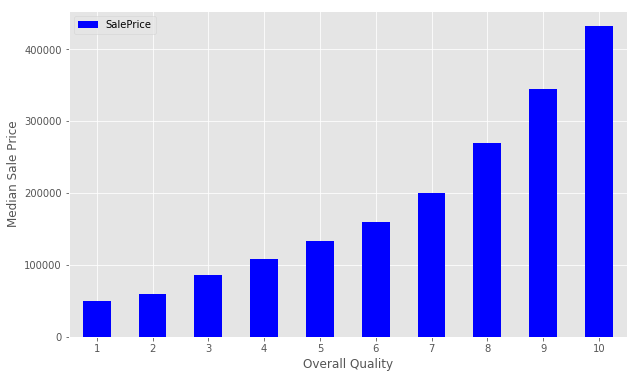

In [42]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

The median sales price increases as Overall Quality increases.

We will use the 'plt.scatter()' to generate scatter plots to show the relationship between the Ground Living Area 'GrLivArea' and 'SalePrice' (the log transformed series)

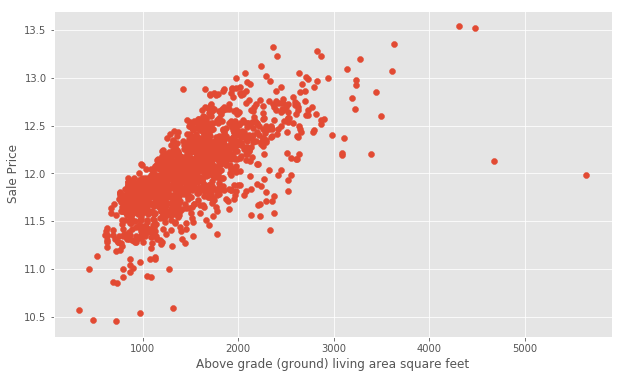

In [47]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We see that increases in living area correspond to increases in price. We will do the same for GarageArea.

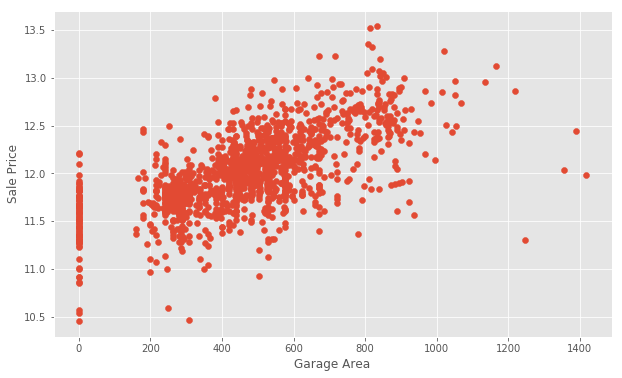

In [49]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

We can see there are many homes with 0 for Garage Area, indicating that they don't have a garage. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So we will remove those observations. There are many techniques for dealing with outliers.

We will create a new dataframe with some outliers removed.

In [50]:
train = train[train['GarageArea'] < 1200]

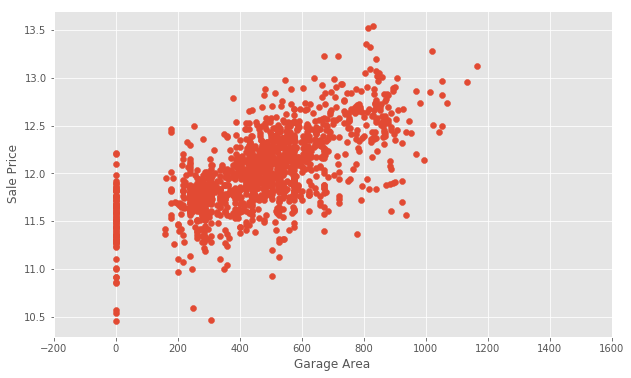

In [51]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

## Handling Null Values

We will create a DataFrame to view the top null columns. 

We will chain together the train.isnull().sum() methods, we will return a Series of the counts of the null values in each column

In [54]:
# create a dataframe of nulls
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls

,0
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [57]:
# enhancing the dataframe with a column and index name
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


For 'PoolQC' (Pool Quality), the value is NaN when PoolArea is 0, or there is no pool. There are similar relationship between many of the Garage-related columns

We will now look at 'MiscFeature'

In [58]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


These values describe whether the house has a shed over 100 sqft, a second garage etc. We might want to use this information later. It's important to gather domain knowledge to make the best decisions when dealing with missing data.

## Examining the Non-numeric Features

In [59]:
# select only the character fields
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


'top' is the most commonly occurring value, with the frequency of the top value shown by 'freq'.

For many of these features, we could use 'one-hot encoding', which is a technique to transform categorical data into numbers, so the model can understand whether or not a particular observation falls into one category or another.

## Transforming and Engineering Features

Any transformations applied to the training data before fitting the model, must be applied to the test data.

Consider the 'Street' data, which indicates whether there is Gravel or Paved road access to the property.

In [60]:
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In the 'Street' column, the unique values are Pave and Grvl. Only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We will create a new column called 'enc_street'. We will use the 'pd.get_dummies()' method to do this.

We need to do this on both the train and test data.

In [61]:
# create new column 'enc_street' consisting of 0s and 1s depending 
# on the value in the 'Street' column

train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
# test the new column, to see whether 1s and 0s have been added
train['enc_street'].head()

0    1
1    1
2    1
3    1
4    1
Name: enc_street, dtype: uint8

In [65]:
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


We have engineered our first feature. Feature Engineering is the process of making features of the data suitable for use in machine learning e.g. when we encoded the Street feature into a column of Boolean values, we engineered a feature.

We will engineer another feature. We will look at 'SaleCondition' by constructing (and plotting) a pivot table, as we did above for 'OverallQual'.

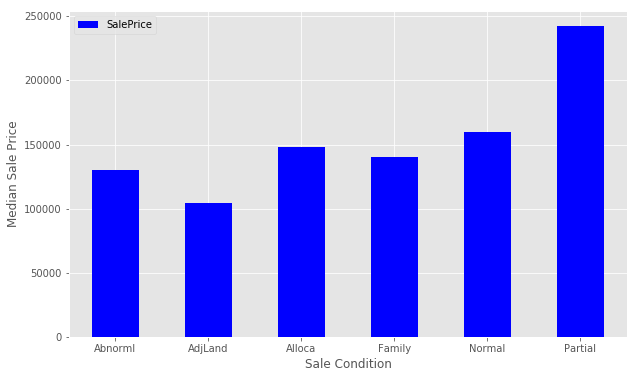

In [66]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can see 'Partial' has a higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Partial and assign the value 1, otherwise 0.

In [68]:
# create a function 'encode' that takes in a row value
def encode(x): 
    return 1 if x == 'Partial' else 0

In [69]:
# instead of using the 'dummy' method, run the function above, for each row
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
# test the new column, to see whether 1s and 0s have been added
train['enc_condition'].head()

0    0
1    0
2    0
3    0
4    0
Name: enc_condition, dtype: int64

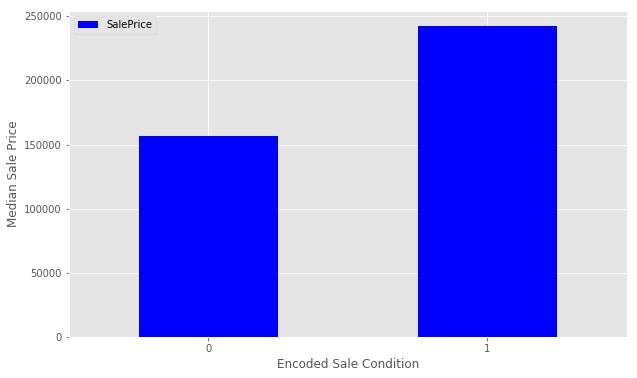

In [71]:
# explore this new feature as a plot
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can continue to work with more features to improve the performance of the model.

Before we prepare the data for modeling, we need to deal with the missing data. We will fill the missing values with an average value, and then assign the results to the data. This is a method of 'interpolation', using the 'DataFrame.interpolate()' method.

In [76]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [77]:
# check if all columns have 0 null values
sum(data.isnull().sum() != 0)

0

## Build a Linear Model

We will perform the final steps to prepare our data for modeling. We will separate the features and the target variable for modeling. We will assign the features to 'X' and the target variable to 'y'. 

We use 'np.log()' as explained above to transform the y variable for the model. 

Also, 'data.drop([features], axis=1)' instructs which columns we want to exclude. We won't include SalePrice for obvious reasons, and 'Id' is just an index with no relationship to SalePrice.

In [78]:
y = np.log(train.SalePrice)

In [79]:
X = data.drop(['SalePrice', 'Id'], axis=1)

We will partition the data and start modeling

We will use the 'train_test_split()' function to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data it's never seen before. If we train the model on all the test data, it will be difficult to tell whether overfitting has taken place

'train_test_split()' returns four objects:

- X_train is the subset of our features used for training
- X_test is the subset which will be our 'hold-out' set - we use to test the model
- y_train is the target variable 'SalePrice' which corresponds to X_train
- y_test is the target variable 'SalePrice' which corresponds to X_test

The first parameter value 'X' denotes the set of predictor data, and 'y' is the target variable

Next, we set random_state=42. This provides for reproducible results, since the 'train_test_split' will randomly partition the data. The 'test_size' parameter tells the function what proportion of the data should be in the test partition. 33% of the data will be devoted to the hold-out set.

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

## Begin Modelling

We will first create a Linear Regression model. First, we instantiate the model.

In [81]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Next, we fit the model, which is a procedure that varies for different models. Essentially, we are estimating the relationship between our predictors and the target variable, so we can make accurate predictions on new data

We fit the model using 'X_train' and 'y_train', and we'll score with 'X_test' and 'y_test'

The 'lr.fit()' method will fit the linear regression on the features and target variable that we pass

In [82]:
model = lr.fit(X_train, y_train)

## Evaluate the Performance and Visualise Results

We should evaluate the performance of the model. We will use the root-mean-squared-error (RMSE) method. We will also look at The r-squared value. 

The r-squared value is a measure of how close the test data is to the fitted regression line. It takes a value between 0 and 1; 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The 'model.score()' method returns the r-squared value by default

In [83]:
# show the r-squared value
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262491


This means that our features explain approximately 89% of the variance in our target variable.

Next, we will consider the 'rmse'. To do this, we will use the model we have built to make predictions on the test data set.

In [84]:
predictions = model.predict(X_test)

The 'model.predict()' method will return a list of predictions given a set of predictors.

The 'mean_squared_error' function takes two arrays and calculates the rmse.

In [85]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519568566


Interpreting this value is more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship with a scatter plot.

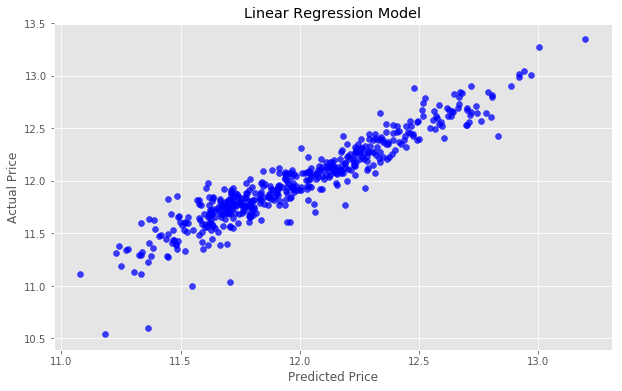

In [86]:
# compare predictions with the actual values
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') # alpha helps show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line y=x, because each predicted value x would be equal to each actual value y.

## Improving the Model

We will try using 'Ridge Regularisation' to decrease the influence of less important features. Ridge Regularisation is a process which shrinks the regression coefficients of less important features.

We will once again instantiate the model. The Ridge Regularisation model takes a parameter, alpha , which controls the strength of the regularisation.

We will experiment by looping through a few different values of alpha, and see how this changes our results.

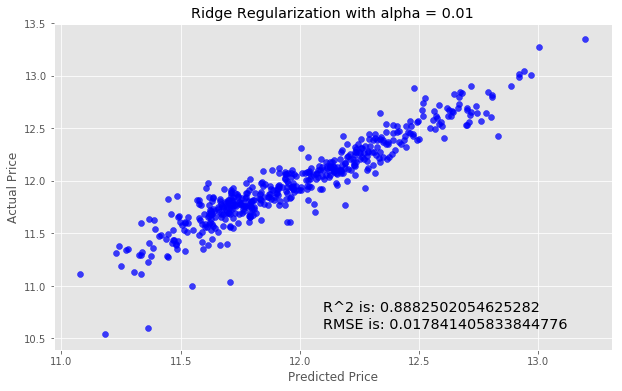

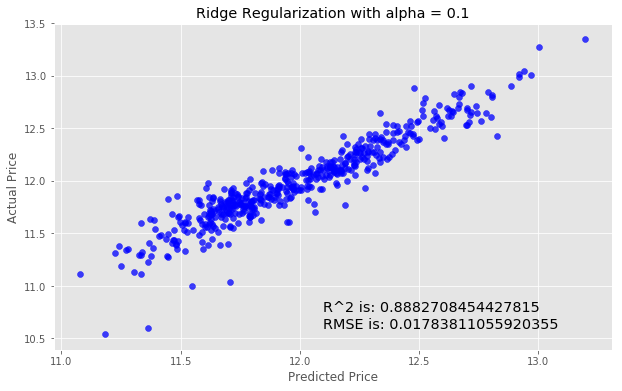

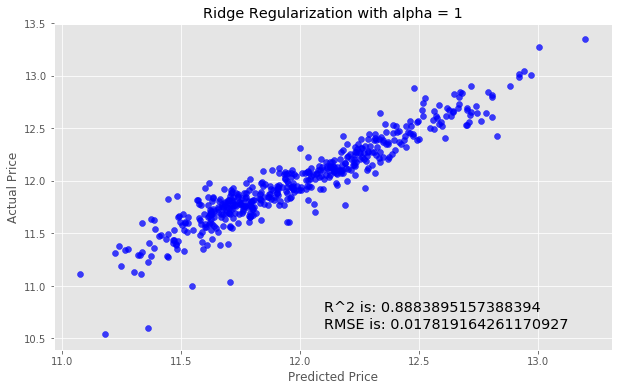

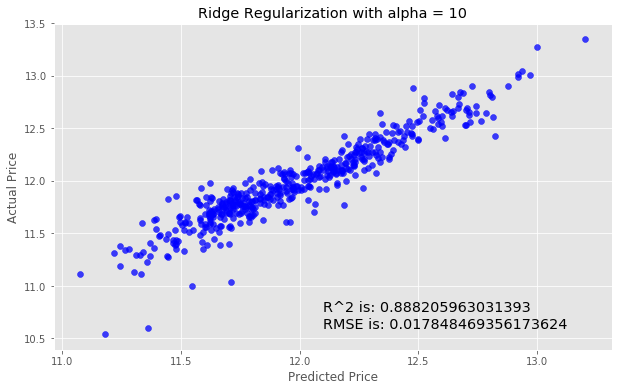

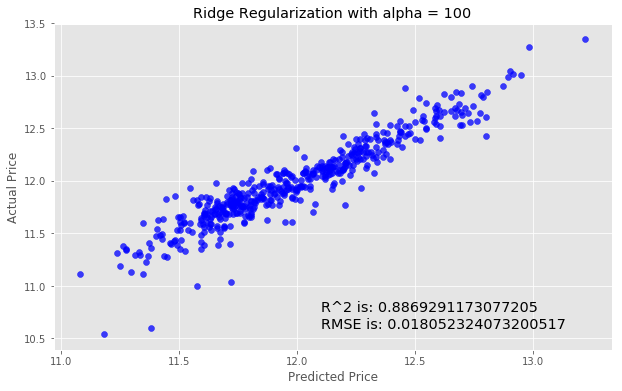

In [87]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularisation can be helpful. We should repeat this step after we've added more features.